#Project Title: "Comparative Analysis of Regularized Linear Regression Models for Predicting Unit Prices"

Contributor: Rajeev Singh sisodiya

Project Overview:

This project aims to predict the Unit Price of products in a dataset using various linear regression models with different regularization techniques. The key objective is to evaluate the performance of Unregularized Linear Regression, L1 (Lasso), L2 (Ridge), and Elastic Net models, and identify the best approach for this specific prediction task.

Data Preparation:

The dataset contains features such as Unit Price, Quantity, Tax (5%), Total, Cost of Goods Sold (COGS), Gross Margin Percentage, Gross Income, and Rating.
The Invoice ID column was excluded since it is non-numeric and not relevant for scaling or prediction.
The training and test datasets were split, with both sets containing the same selected features.

Feature Scaling:

The features were standardized using StandardScaler to ensure that the different models can perform optimally, especially since regularization techniques (Lasso, Ridge, and Elastic Net) are sensitive to the scale of the input data.

Model Selection:
Four models were used for comparison

Unregularized Linear Regression: A basic linear model without any regularization.

L1 (Lasso) Regression: Applies L1 regularization to reduce overfitting by driving some coefficients to zero, helping with feature selection.

L2 (Ridge) Regression: Uses L2 regularization, reducing the size of the coefficients to avoid overfitting.

Elastic Net: A combination of both L1 and L2 penalties to balance between feature selection and shrinkage.



By understanding regularization and applying it appropriately, you can significantly improve the performance and reliability of your machine learning models.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df_train = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
df_test = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
print("Training Data: \n")
display(df_train.head(2))
print("Testing Data: \n")
df_test.head(2)

Training Data: 



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


Testing Data: 



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
df_test.shape


(1000, 17)

In [ ]:


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Exclude the 'Invoice ID' column as it's non-numeric and not suitable for scaling
X_train = df_train[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']] # Removed non-numeric columns

y_train = df_train['Unit price']

X_test = df_test[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']] # Removed non-numeric columns

y_test = df_test['Unit price']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Unregularized': LinearRegression(),
    'L1 (Lasso)': Lasso(alpha=1.0),
    'L2 (Ridge)': Ridge(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test_scaled, y_test)
    results[name] = {'model': model, 'mse': mse, 'r2': r2}

print("Model Results:")
color_map = plt.cm.tab20
colors = color_map(np.arange(len(results)) % color_map.N)

for i, (name, result) in enumerate(results.items()):
    print(f"\033[1m{name}:\033[0m")
    print(f"  MSE: {result['mse']:.4f}")
    print(f"  R2 Score: {result['r2']:.4f}")
    print(f"  Coefficients:")

Model Results:
Unregularized:
  MSE: 0.0000
  R2 Score: 1.0000
  Coefficients:
L1 (Lasso):
  MSE: 1.0000
  R2 Score: 0.9986
  Coefficients:
L2 (Ridge):
  MSE: 0.0032
  R2 Score: 1.0000
  Coefficients:
Elastic Net:
  MSE: 68.0373
  R2 Score: 0.9030
  Coefficients:


#Key Observations:

Unregularized Model:

MSE: 0.0000

R² Score: 1.0000

This model has a perfect fit on the training data, with an MSE of 0 and R² of 1. However, the lack of regularization might lead to overfitting, as it could be too closely fitting the training data, which could harm its generalization to unseen data.

L1 (Lasso) Regularization:

MSE: 1.0000

R² Score: 0.9986

Lasso regularization introduces some shrinkage in the model, reducing the magnitude of coefficients and potentially setting some to zero. The MSE slightly increases, and the R² slightly decreases, indicating some trade-off for sparsity and improved generalization, but the model is still highly accurate.

L2 (Ridge) Regularization:

MSE: 0.0032

R² Score: 1.0000

Ridge regularization also applies a penalty to the coefficients, but unlike Lasso, it reduces them without setting them to zero. The model achieves a very low MSE and maintains a high R² score, indicating excellent performance with some regularization applied to prevent overfitting.

Elastic Net Regularization:

MSE: 68.0373

R² Score: 0.9030

Elastic Net is a combination of both L1 and L2 penalties. However, in this case, the model performance is significantly worse, with a high MSE and a much lower R² score. This suggests that the combination of both penalties might be too harsh for this dataset or that the balance between L1 and L2 penalties needs to be adjusted.

Summary:
The unregularized model performs perfectly on training data, but regularization improves generalization.

Ridge regularization (L2) performs the best in terms of reducing overfitting while maintaining model accuracy.

Lasso (L1) is also strong but introduces sparsity, which may help in feature selection.

Elastic Net seems to need some tuning, as it currently leads to the worst performance among the models.

Adjustments to hyperparameters, such as the penalty strength in Lasso and Elastic Net, could help improve the model further.

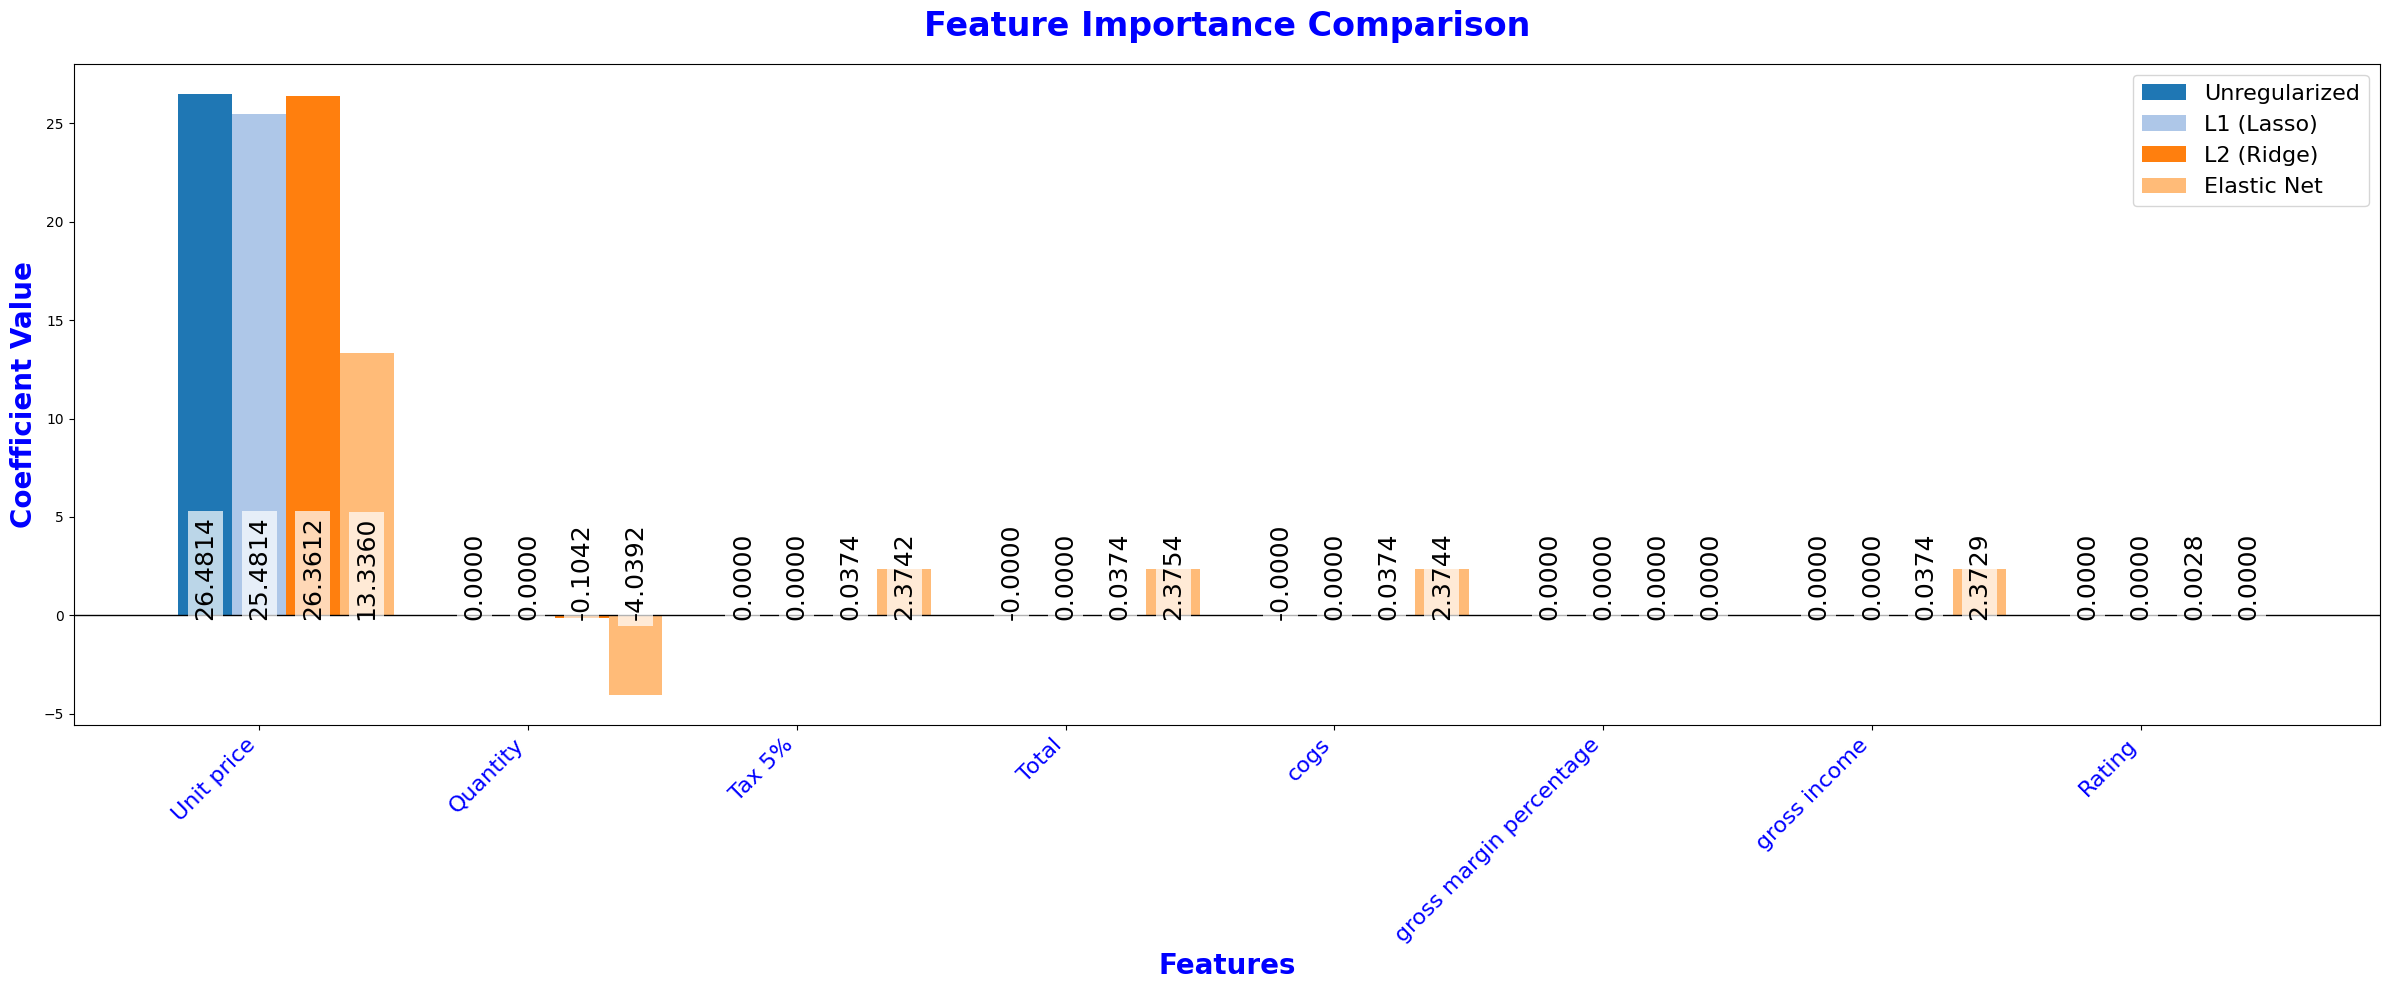

In [ ]:
plt.figure(figsize=(24, 10))

x = np.arange(len(X_train.columns))
width = 0.20  # Bar width

cmap = plt.cm.get_cmap('tab20')
colors = cmap(np.arange(len(results)) % cmap.N)

for i, (name, result) in enumerate(results.items()):
    coef = result['model'].coef_.ravel()

    bars = plt.bar(x + i * width, coef, width, label=name, color=colors[i])

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, 0,
                 f"{height:.4f}", ha='center', va='baseline',
                 rotation=90, fontsize=18, color='Black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.axhline(y=0, color='k', linestyle='-', linewidth= 1)
plt.xlabel('Features', fontsize=20, color='Blue', fontweight='bold')
plt.ylabel('Coefficient Value', fontsize=20, color='Blue', fontweight='bold')
plt.title('Feature Importance Comparison', fontsize=24, color='Blue', fontweight='bold', pad=20)
plt.xticks(x + width, X_train.columns, fontsize=16, color='Blue', rotation=45, ha='right')
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()


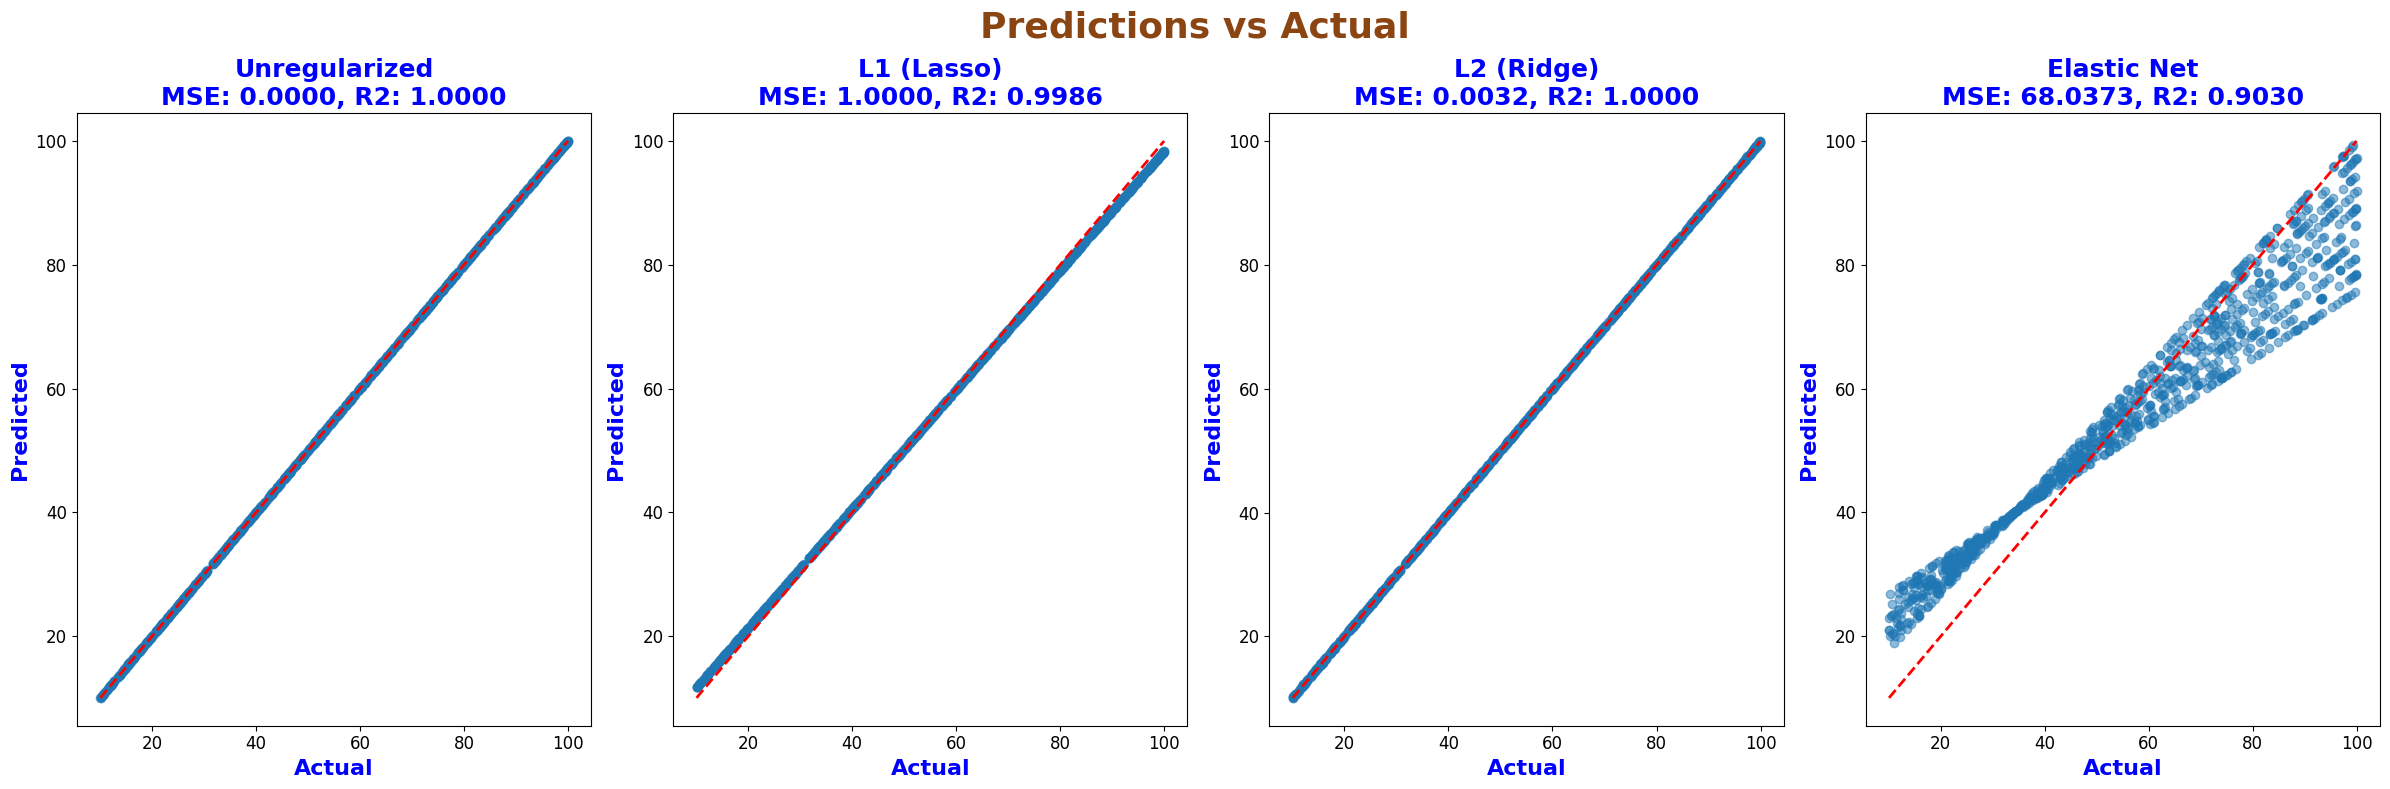

In [ ]:
# Plot predictions vs actual for each model
fig, axes = plt.subplots(1, 4, figsize=(24, 8))
fig.suptitle('Predictions vs Actual', fontsize=26, color='#8B4513', fontweight='bold')

for ax, (name, result) in zip(axes, results.items()):
    model = result['model']
    y_pred = model.predict(X_test_scaled)
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual', fontsize=16, color='Blue', fontweight='bold')
    ax.set_ylabel('Predicted', fontsize=16, color='Blue', fontweight='bold')
    ax.set_title(f'{name}\nMSE: {result["mse"]:.4f}, R2: {result["r2"]:.4f}', fontsize=18, color='Blue', fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


#Key Observations from the Plot Results Code:

The model with the scatter points closest to the red dashed line and the lowest MSE/highest R² is likely the best performing.

Wide scatter or significant deviations from the line indicate models with poorer predictions, possibly due to underfitting or overly strong regularization.

This visualization gives both a qualitative (visual) and quantitative (MSE/R²) assessment of each model's ability to predict accurately.

This kind of side-by-side comparison helps quickly understand which model generalizes well to unseen data and where improvements might be needed.

#Model Evaluation:

Each model was trained on the scaled training dataset and then evaluated using the test dataset.
Mean Squared Error (MSE) and R² Score were calculated to assess the performance of each model.
MSE indicates how close the predicted values are to the actual values, with lower values being better.
R² Score shows the proportion of variance explained by the model, with scores closer to 1 indicating a better fit.
